<a href="https://colab.research.google.com/github/yeanchi/fast_ai_study/blob/master/fast_ai_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import * 
from fastai.metrics import error_rate

In [0]:
b = 64

# 下载数据或者获得数据的路径

In [0]:
help(URLs)  #URLs 包含fast.ai各种数据集
URLs.MNIST_SAMPLE #本次需要的数据集

In [26]:
# path = Path('/root/.fastai/data/mnist_sample')  #直接输入数据地址
# path

PosixPath('/root/.fastai/data/mnist_sample')

对于其他数据集，您需要使用 `untar_data` 或下载它们 `download_data` 。 `untar_data` 将解压缩数据文件并下载，同时 `download_data` 只下载并保存压缩文件的 `.tgz` 格式。
 
 默认情况下，数据将下载到`~/.fastai/data`文件夹。通过编辑
配置默认值。`data_path~/.fastai/config.yml`


如果它不存在则下载url到fname，并且un-tgz到文件夹dest。

In [36]:
path = untar_data(URLs.MNIST_SAMPLE); #获得下载好或者已存在的数据集的路径
path #查看路径

PosixPath('/root/.fastai/data/mnist_sample')

In [27]:
path.ls() # 查看路径下有哪些文件夹，备注：后面有括号（），1.训练集 2.带标签的csv 3.验证集

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

# 把图片或者文字原始文件转化为data文件
可能数据增强以及裁减，文本数据可能 标记化数据化

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

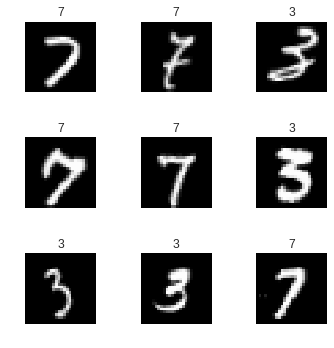

In [38]:
data.show_batch(rows=3, figsize=(5,5))

# 开始学习模型
传入 data、model、以及损失度量

In [39]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 85125491.35it/s]


epoch,train_loss,valid_loss,accuracy,time
1,0.169134,0.084620,0.970069,00:26
2,0.104319,0.050003,0.983317,00:24


In [0]:
learn.save('stage-1-50') # 保存学习模型

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


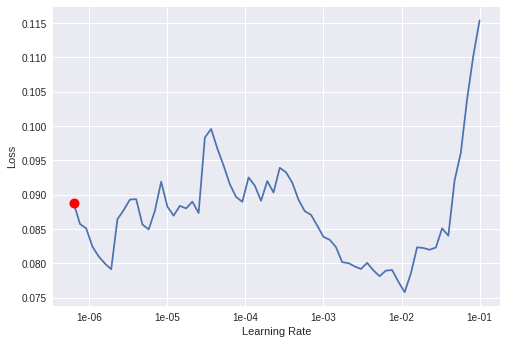

In [0]:
learn.lr_find() #学习速率查找器
learn.recorder.plot() #画图

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-02,1e-06))  # 用 one cycle policy 微调模型

epoch,train_loss,valid_loss,accuracy
1,0.024907,0.009168,0.996565
2,0.018795,0.005273,0.998528
3,0.017513,0.005721,0.998528


# 分类模型的解释
了解哪里出了问题

In [40]:
interp = ClassificationInterpretation.from_learner(learn) #分类模型的解释方法。

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

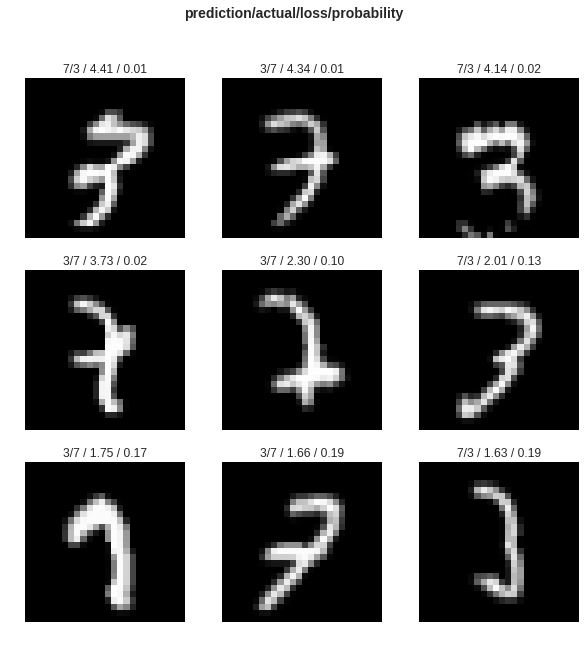

In [41]:
interp.plot_top_losses(9, figsize=(10,10)) # 预览九张图，figsize是预览的长和款，默认开启热视界图

In [0]:
doc(interp.plot_top_losses)

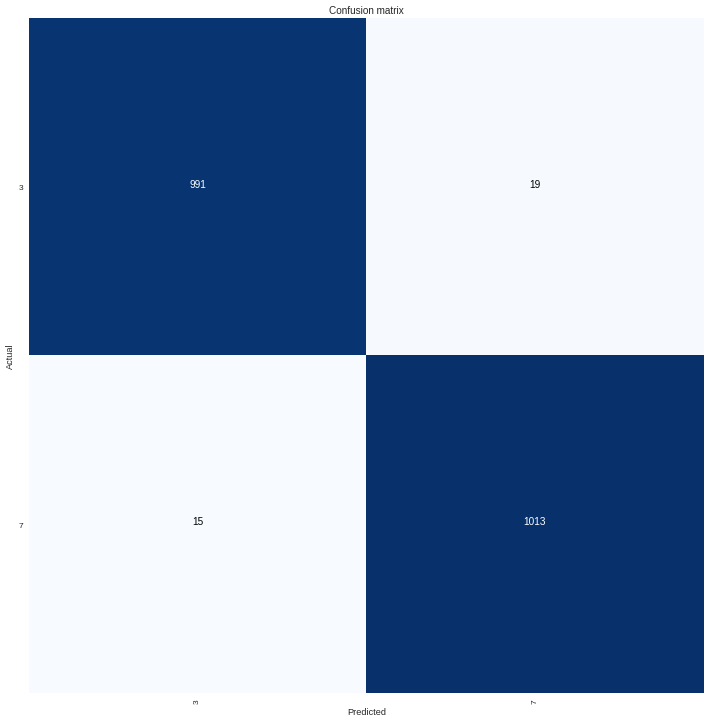

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60) #混淆矩阵

In [44]:
interp.most_confused(min_val=2) # 最容易出错的

[('3', '7', 19), ('7', '3', 15)]